In [11]:
!pip install tensorflow==2.4.0

     ------------------------------------ 370.7/370.7 MB 414.9 kB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 4.5 MB/s eta 0:00:00
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 13.2/13.2 MB 4.8 MB/s eta 0:00:00
     -------------------------------------- 132.0/132.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 462.0/462.0 kB 3.6 MB/s eta 0:00:00
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4855 sha256=03519b95f69667faeedfe4389a9c801635324a7780a4d0a7253a967889c86221
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\19\b5\5e\dde0eb16713e5c2e7d5f

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires absl-py>=1.0.0, but you have absl-py 0.15.0 which is incompatible.
tensorflow-intel 2.11.0 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.
tensorflow-intel 2.11.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
tensorflow-intel 2.11.0 requires tensorflow-estimator<2.12,>=2.11.0, but you have tensorflow-estimator 2.4.0 which is incompatible.
platformdirs 2.6.2 requires typing-extensions>=4.4; python_version < "3.8", but you have typing-extensions 3.7.4.3 which is incompatible.


In [ ]:
!pip uninstall absl-py

In [8]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
img = cv2.imread('./test_images/messi1.jpg')
print(type(img))
img.shape
# print(img)

<class 'numpy.ndarray'>


(600, 1000, 3)

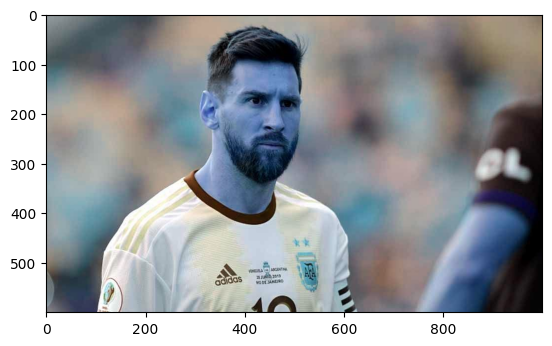

In [6]:
plt.imshow(img)

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(600, 1000)

In [8]:
gray

array([[153, 153, 153, ..., 110, 109, 109],
       [153, 153, 153, ..., 110, 110, 109],
       [153, 153, 153, ..., 111, 111, 110],
       ...,
       [134, 133, 133, ...,   6,   6,   6],
       [134, 134, 133, ...,   6,   6,   6],
       [135, 134, 134, ...,   6,   6,   6]], dtype=uint8)

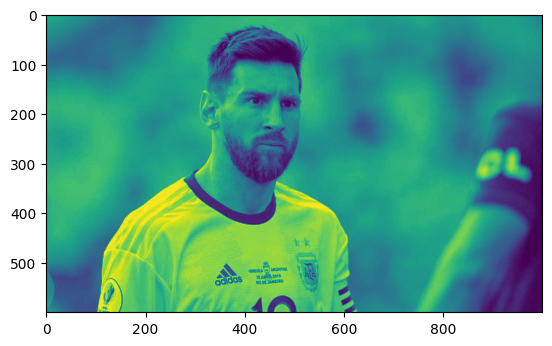

In [9]:
plt.imshow(gray)

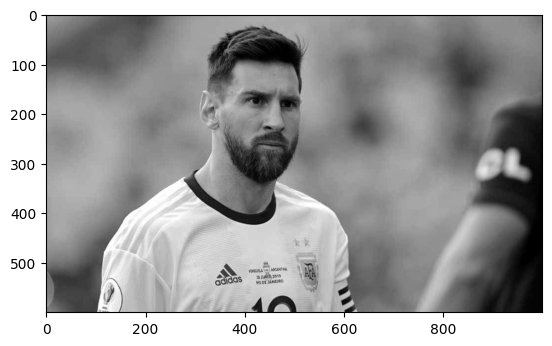

In [10]:
plt.imshow(gray, cmap='gray')

In [11]:
#haar_cascade works with sliding-window approach
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
#scalefactor = 1.3
#minNeighbours = 5
# keep min neighbours high to reduce false pos
faces = face_cascade.detectMultiScale(gray, 1.3, 10)
faces

array([[356, 102, 205, 205]])

In [12]:
(x,y,w,h) = faces[0]
x,y,w,h

(356, 102, 205, 205)

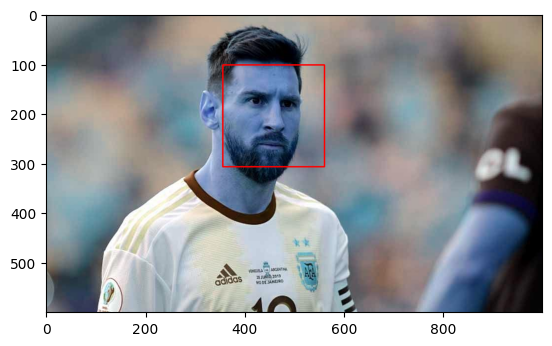

In [13]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

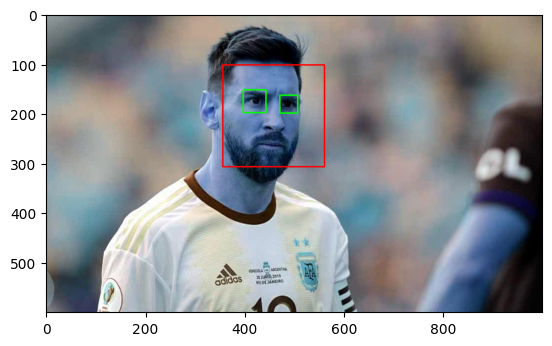

In [14]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

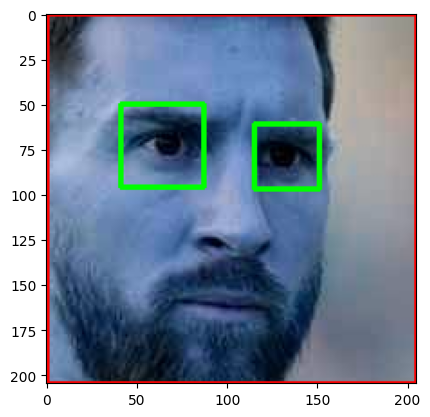

In [15]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [16]:
cropped_img = np.array(roi_color)
cropped_img.shape

(205, 205, 3)

In [17]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

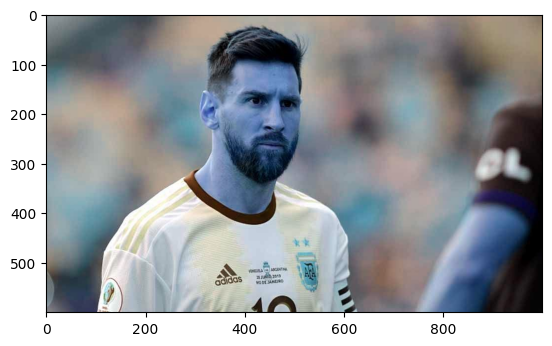

In [18]:
original_image = cv2.imread('./test_images/messi1.jpg')
plt.imshow(original_image)

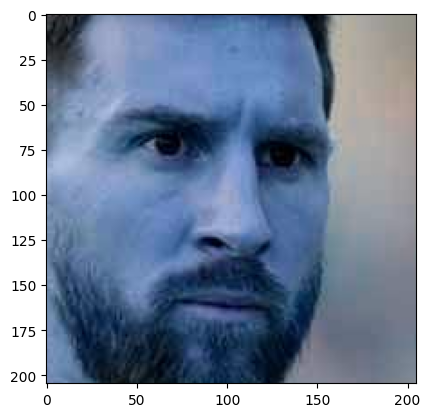

In [19]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/messi1.jpg')
plt.imshow(cropped_image)

In [20]:
path_to_data = "./data/"
path_to_cropped_data = "./cropped_data/"

In [21]:
import os
img_directories = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_directories.append(entry.path)

In [22]:
img_directories

['./data/beckham',
 './data/mbappe',
 './data/messi',
 './data/neymar',
 './data/salah']

In [23]:
import shutil
if os.path.exists(path_to_cropped_data):
     shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [24]:
img_directories

['./data/beckham',
 './data/mbappe',
 './data/messi',
 './data/neymar',
 './data/salah']

In [25]:
cropped_image_directories = []
file_names_dict = {}
for img_dir in img_directories:
    count = 1
    name = img_dir.split('/')[-1]
    file_names_dict[name] = []
    for entry in os.scandir(img_dir):
        print(entry.path)
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_directories.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            file_names_dict[name].append(cropped_file_path)
            count += 1
        else:
            pass

./data/beckham\gettyimages-1006615770-612x612.jpg
Generating cropped images in folder:  ./cropped_data/beckham
./data/beckham\gettyimages-1006615936-612x612.jpg
./data/beckham\gettyimages-101635842-612x612.jpg
./data/beckham\gettyimages-101635847-612x612.jpg
./data/beckham\gettyimages-101719321-612x612.jpg
./data/beckham\gettyimages-102456610-612x612.jpg
./data/beckham\gettyimages-103206571-612x612.jpg
./data/beckham\gettyimages-103294664-612x612.jpg
./data/beckham\gettyimages-103295371-612x612.jpg
./data/beckham\gettyimages-103295777-612x612.jpg
./data/beckham\gettyimages-103299227-612x612.jpg
./data/beckham\gettyimages-103299230-612x612.jpg
./data/beckham\gettyimages-103299233-612x612.jpg
./data/beckham\gettyimages-104818590-612x612.jpg
./data/beckham\gettyimages-104818591-612x612.jpg
./data/beckham\gettyimages-104818592-612x612.jpg
./data/beckham\gettyimages-105141394-612x612.jpg
./data/beckham\gettyimages-105145104-612x612.jpg
./data/beckham\gettyimages-105145117-612x612.jpg
./data

./data/beckham\gettyimages-129975872-612x612.jpg
./data/beckham\gettyimages-1308649072-612x612.jpg
./data/beckham\gettyimages-1308649124-612x612.jpg
./data/beckham\gettyimages-1308649138-612x612.jpg
./data/beckham\gettyimages-1308649603-612x612.jpg
./data/beckham\gettyimages-1313158322-612x612.jpg
./data/beckham\gettyimages-1313158324-612x612.jpg
./data/beckham\gettyimages-1313158333-612x612.jpg
./data/beckham\gettyimages-1313328279-612x612.jpg
./data/beckham\gettyimages-1313329428-612x612.jpg
./data/beckham\gettyimages-1334017-612x612.jpg
./data/beckham\gettyimages-1340293747-612x612.jpg
./data/beckham\gettyimages-1340295372-612x612.jpg
./data/beckham\gettyimages-1340295466-612x612.jpg
./data/beckham\gettyimages-1340295715-612x612.jpg
./data/beckham\gettyimages-1340306910-612x612.jpg
./data/beckham\gettyimages-1340307687-612x612.jpg
./data/beckham\gettyimages-1340307689-612x612.jpg
./data/beckham\gettyimages-1340323306-612x612.jpg
./data/beckham\gettyimages-1340323307-612x612.jpg
./da

./data/beckham\gettyimages-504768884-612x612.jpg
./data/beckham\gettyimages-504768888-612x612.jpg
./data/beckham\gettyimages-50920470-612x612.jpg
./data/beckham\gettyimages-50961536-612x612.jpg
./data/beckham\gettyimages-50995975-612x612.jpg
./data/beckham\gettyimages-50995987-612x612.jpg
./data/beckham\gettyimages-51070891-612x612.jpg
./data/beckham\gettyimages-51124069-612x612.jpg
./data/beckham\gettyimages-51124071-612x612.jpg
./data/beckham\gettyimages-51178146-612x612.jpg
./data/beckham\gettyimages-51185908-612x612.jpg
./data/beckham\gettyimages-51258847-612x612.jpg
./data/beckham\gettyimages-51404698-612x612.jpg
./data/beckham\gettyimages-514668606-612x612.jpg
./data/beckham\gettyimages-514668628-612x612.jpg
./data/beckham\gettyimages-515908520-612x612.jpg
./data/beckham\gettyimages-515909304-612x612.jpg
./data/beckham\gettyimages-51743462-612x612.jpg
./data/beckham\gettyimages-51743466-612x612.jpg
./data/beckham\gettyimages-51743505-612x612.jpg
./data/beckham\gettyimages-5174351

./data/beckham\gettyimages-78121381-612x612.jpg
./data/beckham\gettyimages-78121763-612x612.jpg
./data/beckham\gettyimages-78122299-612x612.jpg
./data/beckham\gettyimages-78122302-612x612.jpg
./data/beckham\gettyimages-78122322-612x612.jpg
./data/beckham\gettyimages-78122583-612x612.jpg
./data/beckham\gettyimages-78141159-612x612.jpg
./data/beckham\gettyimages-78168718-612x612.jpg
./data/beckham\gettyimages-78221359-612x612.jpg
./data/beckham\gettyimages-78299226-612x612.jpg
./data/beckham\gettyimages-78339605-612x612.jpg
./data/beckham\gettyimages-79740174-612x612.jpg
./data/beckham\gettyimages-79976373-612x612.jpg
./data/beckham\gettyimages-80390050-612x612.jpg
./data/beckham\gettyimages-80394915-612x612.jpg
./data/beckham\gettyimages-81437190-612x612.jpg
./data/beckham\gettyimages-81957968-612x612.jpg
./data/beckham\gettyimages-81961306-612x612.jpg
./data/beckham\gettyimages-82102682-612x612.jpg
./data/beckham\gettyimages-82102689-612x612.jpg
./data/beckham\gettyimages-82102745-612x

./data/mbappe\gettyimages-1231418526-612x612.jpg
./data/mbappe\gettyimages-1232501623-612x612.jpg
./data/mbappe\gettyimages-1234962225-612x612.jpg
./data/mbappe\gettyimages-1234973412-612x612.jpg
./data/mbappe\gettyimages-1234974332-612x612.jpg
./data/mbappe\gettyimages-1235298656-612x612.jpg
./data/mbappe\gettyimages-1235421714-612x612.jpg
./data/mbappe\gettyimages-1235569866-612x612.jpg
./data/mbappe\gettyimages-1235669262-612x612.jpg
./data/mbappe\gettyimages-1235669297-612x612.jpg
./data/mbappe\gettyimages-1235669907-612x612.jpg
./data/mbappe\gettyimages-1235672916-612x612.jpg
./data/mbappe\gettyimages-1235903414-612x612.jpg
./data/mbappe\gettyimages-1235983843-612x612.jpg
./data/mbappe\gettyimages-1236549163-612x612.jpg
./data/mbappe\gettyimages-1236559070-612x612.jpg
./data/mbappe\gettyimages-1237198304-612x612.jpg
./data/mbappe\gettyimages-1237199711-612x612.jpg
./data/mbappe\gettyimages-1237201625-612x612.jpg
./data/mbappe\gettyimages-1237943936-612x612.jpg
./data/mbappe\gettyi

./data/mbappe\gettyimages-1344957155-612x612.jpg
./data/mbappe\gettyimages-1344957317-612x612.jpg
./data/mbappe\gettyimages-1345408411-612x612.jpg
./data/mbappe\gettyimages-1346368187-612x612.jpg
./data/mbappe\gettyimages-1347536811-612x612.jpg
./data/mbappe\gettyimages-1347563473-612x612.jpg
./data/mbappe\gettyimages-1347641915-612x612.jpg
./data/mbappe\gettyimages-1347641954-612x612.jpg
./data/mbappe\gettyimages-1347642189-612x612.jpg
./data/mbappe\gettyimages-1347659074-612x612.jpg
./data/mbappe\gettyimages-1352063954-612x612.jpg
./data/mbappe\gettyimages-1352064716-612x612.jpg
./data/mbappe\gettyimages-1352064738-612x612.jpg
./data/mbappe\gettyimages-1352065166-612x612.jpg
./data/mbappe\gettyimages-1353112796-612x612.jpg
./data/mbappe\gettyimages-1353117927-612x612.jpg
./data/mbappe\gettyimages-1353992995-612x612.jpg
./data/mbappe\gettyimages-1354763210-612x612.jpg
./data/mbappe\gettyimages-1355340764-612x612.jpg
./data/mbappe\gettyimages-1355340771-612x612.jpg
./data/mbappe\gettyi

./data/mbappe\gettyimages-1442234453-612x612.jpg
./data/mbappe\gettyimages-1442707933-612x612.jpg
./data/mbappe\gettyimages-1443678075-612x612.jpg
./data/mbappe\gettyimages-1443817551-612x612.jpg
./data/mbappe\gettyimages-1444412056-612x612 (1).jpg
./data/mbappe\gettyimages-1444412056-612x612 (2).jpg
./data/mbappe\gettyimages-1444412056-612x612.jpg
./data/mbappe\gettyimages-1444743248-612x612.jpg
./data/mbappe\gettyimages-1444748531-612x612 (1).jpg
./data/mbappe\gettyimages-1444748531-612x612 (2).jpg
./data/mbappe\gettyimages-1444748531-612x612.jpg
./data/mbappe\gettyimages-1444748698-612x612.jpg
./data/mbappe\gettyimages-1444750234-612x612.jpg
./data/mbappe\gettyimages-1444762641-612x612.jpg
./data/mbappe\gettyimages-1444765321-612x612.jpg
./data/mbappe\gettyimages-1444765593-612x612.jpg
./data/mbappe\gettyimages-1444767022-612x612.jpg
./data/mbappe\gettyimages-1444773431-612x612.jpg
./data/mbappe\gettyimages-1444818672-612x612.jpg
./data/mbappe\gettyimages-1444900000-612x612.jpg
./da

Generating cropped images in folder:  ./cropped_data/messi
./data/messi\gettyimages-101656249-612x612.jpg
./data/messi\gettyimages-101656321-612x612.jpg
./data/messi\gettyimages-101656340-612x612.jpg
./data/messi\gettyimages-101656663-612x612.jpg
./data/messi\gettyimages-101656694-612x612.jpg
./data/messi\gettyimages-101658823-612x612.jpg
./data/messi\gettyimages-102038360-612x612.jpg
./data/messi\gettyimages-102038396-612x612.jpg
./data/messi\gettyimages-102038400-612x612.jpg
./data/messi\gettyimages-102174046-612x612.jpg
./data/messi\gettyimages-102302706-612x612.jpg
./data/messi\gettyimages-1026233568-612x612.jpg
./data/messi\gettyimages-1026243798-612x612.jpg
./data/messi\gettyimages-1045151332-612x612.jpg
./data/messi\gettyimages-1045151508-612x612.jpg
./data/messi\gettyimages-1045151618-612x612.jpg
./data/messi\gettyimages-1045151718-612x612.jpg
./data/messi\gettyimages-1053250448-612x612.jpg
./data/messi\gettyimages-1071842504-612x612.jpg
./data/messi\gettyimages-1071847484-612x

./data/messi\gettyimages-1323580298-612x612.jpg
./data/messi\gettyimages-1323581821-612x612.jpg
./data/messi\gettyimages-1324290905-612x612.jpg
./data/messi\gettyimages-1324313637-612x612.jpg
./data/messi\gettyimages-1325270727-612x612.jpg
./data/messi\gettyimages-1325988528-612x612.jpg
./data/messi\gettyimages-1325988530-612x612.jpg
./data/messi\gettyimages-1325991031-612x612.jpg
./data/messi\gettyimages-1325991066-612x612.jpg
./data/messi\gettyimages-1325994295-612x612.jpg
./data/messi\gettyimages-1325998720-612x612.jpg
./data/messi\gettyimages-1325998721-612x612.jpg
./data/messi\gettyimages-1325998785-612x612.jpg
./data/messi\gettyimages-1325998786-612x612.jpg
./data/messi\gettyimages-1326861057-612x612.jpg
./data/messi\gettyimages-1326869198-612x612.jpg
./data/messi\gettyimages-1326869202-612x612.jpg
./data/messi\gettyimages-1327379432-612x612.jpg
./data/messi\gettyimages-1327379574-612x612.jpg
./data/messi\gettyimages-1327380433-612x612.jpg
./data/messi\gettyimages-1327380535-612x

./data/messi\gettyimages-1438484180-612x612.jpg
./data/messi\gettyimages-1442775934-612x612.jpg
./data/messi\gettyimages-1442775941-612x612.jpg
./data/messi\gettyimages-1442775966-612x612.jpg
./data/messi\gettyimages-1442776079-612x612.jpg
./data/messi\gettyimages-1442776080-612x612.jpg
./data/messi\gettyimages-1442776730-612x612.jpg
./data/messi\gettyimages-1442776744-612x612.jpg
./data/messi\gettyimages-1443301162-612x612.jpg
./data/messi\gettyimages-1443307101-612x612.jpg
./data/messi\gettyimages-1443307104-612x612.jpg
./data/messi\gettyimages-1443307112-612x612.jpg
./data/messi\gettyimages-1443502309-612x612.jpg
./data/messi\gettyimages-1443506977-612x612.jpg
./data/messi\gettyimages-1443507707-612x612.jpg
./data/messi\gettyimages-1443554790-612x612.jpg
./data/messi\gettyimages-1443563517-612x612.jpg
./data/messi\gettyimages-1443563603-612x612.jpg
./data/messi\gettyimages-1443585303-612x612.jpg
./data/messi\gettyimages-1443585497-612x612.jpg
./data/messi\gettyimages-1443585499-612x

./data/messi\gettyimages-671989562-612x612.jpg
./data/messi\gettyimages-671989618-612x612.jpg
./data/messi\gettyimages-671989646-612x612.jpg
./data/messi\gettyimages-680292830-612x612.jpg
./data/messi\gettyimages-688641272-612x612.jpg
./data/messi\gettyimages-694068410-612x612.jpg
./data/messi\gettyimages-694126460-612x612.jpg
./data/messi\gettyimages-71308191-612x612.jpg
./data/messi\gettyimages-75426135-612x612.jpg
./data/messi\gettyimages-77727839-612x612.jpg
./data/messi\gettyimages-77727841-612x612.jpg
./data/messi\gettyimages-78223189-612x612.jpg
./data/messi\gettyimages-827349898-612x612.jpg
./data/messi\gettyimages-832850352-612x612.jpg
./data/messi\gettyimages-83560259-612x612.jpg
./data/messi\gettyimages-843240078-612x612.jpg
./data/messi\gettyimages-844968942-612x612.jpg
./data/messi\gettyimages-846131882-612x612.jpg
./data/messi\gettyimages-849762894-612x612.jpg
./data/messi\gettyimages-856248488-612x612.jpg
./data/messi\gettyimages-859946296-612x612.jpg
./data/messi\gettyi

./data/neymar\gettyimages-1244331482-612x612.jpg
./data/neymar\gettyimages-1244747180-612x612.jpg
./data/neymar\gettyimages-1244747198-612x612.jpg
./data/neymar\gettyimages-1244747951-612x612.jpg
./data/neymar\gettyimages-1244754229-612x612.jpg
./data/neymar\gettyimages-1244754449-612x612.jpg
./data/neymar\gettyimages-1245062261-612x612.jpg
./data/neymar\gettyimages-1245070475-612x612.jpg
./data/neymar\gettyimages-1245194714-612x612.jpg
./data/neymar\gettyimages-1245194777-612x612.jpg
./data/neymar\gettyimages-1245388663-612x612.jpg
./data/neymar\gettyimages-1245390839-612x612.jpg
./data/neymar\gettyimages-1245391174-612x612.jpg
./data/neymar\gettyimages-1245392017-612x612.jpg
./data/neymar\gettyimages-1245392050-612x612.jpg
./data/neymar\gettyimages-1245395038-612x612 (1).jpg
./data/neymar\gettyimages-1245395038-612x612.jpg
./data/neymar\gettyimages-1245407648-612x612.jpg
./data/neymar\gettyimages-1245407656-612x612.jpg
./data/neymar\gettyimages-1245407658-612x612.jpg
./data/neymar\ge

./data/neymar\gettyimages-1351248283-612x612.jpg
./data/neymar\gettyimages-1351253044-612x612.jpg
./data/neymar\gettyimages-1351253045-612x612.jpg
./data/neymar\gettyimages-1351736423-612x612.jpg
./data/neymar\gettyimages-1352081871-612x612.jpg
./data/neymar\gettyimages-1352533036-612x612 (1).jpg
./data/neymar\gettyimages-1352533036-612x612.jpg
./data/neymar\gettyimages-1352533064-612x612.jpg
./data/neymar\gettyimages-1352533072-612x612 (1).jpg
./data/neymar\gettyimages-1352533072-612x612.jpg
./data/neymar\gettyimages-1352771516-612x612.jpg
./data/neymar\gettyimages-1352771520-612x612.jpg
./data/neymar\gettyimages-1352775610-612x612.jpg
./data/neymar\gettyimages-1352777014-612x612 (1).jpg
./data/neymar\gettyimages-1352777014-612x612.jpg
./data/neymar\gettyimages-1352777064-612x612 (1).jpg
./data/neymar\gettyimages-1352777064-612x612.jpg
./data/neymar\gettyimages-1354550492-612x612.jpg
./data/neymar\gettyimages-1355338286-612x612 (1).jpg
./data/neymar\gettyimages-1355338286-612x612.jpg


./data/neymar\gettyimages-1446318727-612x612 (1).jpg
./data/neymar\gettyimages-1446318727-612x612.jpg
./data/neymar\gettyimages-1446318929-612x612.jpg
./data/neymar\gettyimages-1446319702-612x612.jpg
./data/neymar\gettyimages-1446319732-612x612.jpg
./data/neymar\gettyimages-1446319748-612x612.jpg
./data/neymar\gettyimages-1446319761-612x612.jpg
./data/neymar\gettyimages-1446319766-612x612.jpg
./data/neymar\gettyimages-1446328707-612x612.jpg
./data/neymar\gettyimages-1446357306-612x612 (1).jpg
./data/neymar\gettyimages-1446357306-612x612.jpg
./data/neymar\gettyimages-1446357309-612x612.jpg
./data/neymar\gettyimages-1446357315-612x612.jpg
./data/neymar\gettyimages-1446357319-612x612.jpg
./data/neymar\gettyimages-1446357324-612x612.jpg
./data/neymar\gettyimages-1446432859-612x612.jpg
./data/neymar\gettyimages-1446432889-612x612.jpg
./data/neymar\gettyimages-1446432894-612x612.jpg
./data/neymar\gettyimages-1446432942-612x612.jpg
./data/neymar\gettyimages-1446974542-612x612.jpg
./data/neyma

./data/neymar\gettyimages-977079260-612x612.jpg
./data/neymar\gettyimages-977926694-612x612.jpg
./data/neymar\gettyimages-981205174-612x612.jpg
./data/neymar\gettyimages-985436566-612x612.jpg
./data/neymar\gettyimages-985491054-612x612.jpg
./data/neymar\gettyimages-985492504-612x612.jpg
./data/neymar\gettyimages-985492588-612x612.jpg
./data/neymar\gettyimages-985493968-612x612.jpg
./data/neymar\gettyimages-985494614-612x612.jpg
./data/neymar\gettyimages-985494618-612x612.jpg
./data/neymar\gettyimages-985494938-612x612 (1).jpg
./data/neymar\gettyimages-985494938-612x612.jpg
./data/neymar\gettyimages-985494972-612x612.jpg
./data/neymar\gettyimages-985538700-612x612.jpg
./data/neymar\gettyimages-985645102-612x612.jpg
./data/neymar\gettyimages-986150004-612x612.jpg
./data/neymar\gettyimages-987113006-612x612.jpg
./data/neymar\gettyimages-987113050-612x612.jpg
./data/neymar\gettyimages-988849980-612x612.jpg
./data/neymar\gettyimages-989745662-612x612.jpg
./data/neymar\gettyimages-989759142-

./data/salah\gettyimages-1233076755-612x612.jpg
./data/salah\gettyimages-1234711978-612x612.jpg
./data/salah\gettyimages-1234712941-612x612.jpg
./data/salah\gettyimages-1235333282-612x612.jpg
./data/salah\gettyimages-1236001729-612x612.jpg
./data/salah\gettyimages-1236001864-612x612.jpg
./data/salah\gettyimages-1236081968-612x612.jpg
./data/salah\gettyimages-1236329844-612x612.jpg
./data/salah\gettyimages-1236339304-612x612.jpg
./data/salah\gettyimages-1236476275-612x612.jpg
./data/salah\gettyimages-1236943743-612x612 (1).jpg
./data/salah\gettyimages-1236943743-612x612.jpg
./data/salah\gettyimages-1236945093-612x612.jpg
./data/salah\gettyimages-1237338417-612x612.jpg
./data/salah\gettyimages-1238810481-612x612.jpg
./data/salah\gettyimages-1238810663-612x612.jpg
./data/salah\gettyimages-1239766936-612x612.jpg
./data/salah\gettyimages-1240284222-612x612.jpg
./data/salah\gettyimages-1240284253-612x612.jpg
./data/salah\gettyimages-1240284292-612x612.jpg
./data/salah\gettyimages-1240284296-

./data/salah\gettyimages-1389827570-612x612.jpg
./data/salah\gettyimages-1394074380-612x612.jpg
./data/salah\gettyimages-1394101705-612x612.jpg
./data/salah\gettyimages-1394269595-612x612.jpg
./data/salah\gettyimages-1394269601-612x612.jpg
./data/salah\gettyimages-1394269607-612x612.jpg
./data/salah\gettyimages-1394269608-612x612.jpg
./data/salah\gettyimages-1394269613-612x612.jpg
./data/salah\gettyimages-1394269619-612x612.jpg
./data/salah\gettyimages-1395208610-612x612.jpg
./data/salah\gettyimages-1395312403-612x612.jpg
./data/salah\gettyimages-1395430039-612x612.jpg
./data/salah\gettyimages-1395502680-612x612.jpg
./data/salah\gettyimages-1395502683-612x612.jpg
./data/salah\gettyimages-1395502684-612x612.jpg
./data/salah\gettyimages-1395502689-612x612 (1).jpg
./data/salah\gettyimages-1395502689-612x612.jpg
./data/salah\gettyimages-1396537863-612x612.jpg
./data/salah\gettyimages-1396537990-612x612.jpg
./data/salah\gettyimages-1397340084-612x612.jpg
./data/salah\gettyimages-1398668078-

./data/salah\gettyimages-939079134-612x612.jpg
./data/salah\gettyimages-939139108-612x612.jpg
./data/salah\gettyimages-939139136-612x612.jpg
./data/salah\gettyimages-939139176-612x612.jpg
./data/salah\gettyimages-939657980-612x612.jpg
./data/salah\gettyimages-939658104-612x612.jpg
./data/salah\gettyimages-939690518-612x612.jpg
./data/salah\gettyimages-939691066-612x612.jpg
./data/salah\gettyimages-939691120-612x612.jpg
./data/salah\gettyimages-939691138-612x612.jpg
./data/salah\gettyimages-939691188-612x612.jpg
./data/salah\gettyimages-939691306-612x612.jpg
./data/salah\gettyimages-939708470-612x612.jpg
./data/salah\gettyimages-939708736-612x612.jpg
./data/salah\gettyimages-939708748-612x612.jpg
./data/salah\gettyimages-939708814-612x612.jpg
./data/salah\gettyimages-939709018-612x612.jpg
./data/salah\gettyimages-940392692-612x612.jpg
./data/salah\gettyimages-943840326-612x612.jpg
./data/salah\gettyimages-943840360-612x612.jpg
./data/salah\gettyimages-943849676-612x612.jpg
./data/salah\

In [26]:
person_file_names_dict = {}
for img_dir in cropped_image_directories:
    name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    person_file_names_dict[name] = file_list
person_file_names_dict

{'beckham': ['./cropped_data/beckham\\beckham1.png',
  './cropped_data/beckham\\beckham10.png',
  './cropped_data/beckham\\beckham100.png',
  './cropped_data/beckham\\beckham101.png',
  './cropped_data/beckham\\beckham102.png',
  './cropped_data/beckham\\beckham103.png',
  './cropped_data/beckham\\beckham104.png',
  './cropped_data/beckham\\beckham105.png',
  './cropped_data/beckham\\beckham106.png',
  './cropped_data/beckham\\beckham107.png',
  './cropped_data/beckham\\beckham108.png',
  './cropped_data/beckham\\beckham109.png',
  './cropped_data/beckham\\beckham11.png',
  './cropped_data/beckham\\beckham110.png',
  './cropped_data/beckham\\beckham111.png',
  './cropped_data/beckham\\beckham112.png',
  './cropped_data/beckham\\beckham113.png',
  './cropped_data/beckham\\beckham114.png',
  './cropped_data/beckham\\beckham115.png',
  './cropped_data/beckham\\beckham116.png',
  './cropped_data/beckham\\beckham117.png',
  './cropped_data/beckham\\beckham118.png',
  './cropped_data/beckham

In [27]:
class_dict = {}
count = 0
for name in person_file_names_dict.keys():
    class_dict[name] = count
    count = count + 1
class_dict

{'beckham': 0, 'mbappe': 1, 'messi': 2, 'neymar': 3, 'salah': 4}

In [ ]:
X, y = [], []
for name, training_files in person_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
#         img_har = w2d(img,'db1',5)
#         scalled_img_har = cv2.resize(img_har, (32, 32))
#         combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(scalled_raw_img)
        y.append(class_dict[name])     

In [ ]:
#X = np.array(X).reshape(len(X),4096).astype(float)
X = np.array(X)
X = X/255
X.shape

In [ ]:
len(X[0])

In [ ]:
X[0]

In [ ]:
y[0]

In [ ]:
X[0].shape

In [ ]:
class_dict

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
y = np.array(y)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(3000, activation='relu'),
    layers.Dense(5, activation='sigmoid'),
])
ann.compile(optimizer="SGD",
           loss="sparse_categorical_crossentropy",
           metrics=['accuracy'])

In [ ]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    
#     layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
##     tf.keras.layers.BatchNormalization(axis=-1),

    layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((2,2)),

    
    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((2,2)),


#     tf.keras.layers.BatchNormalization(axis=-1),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])
cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

In [ ]:
# cnn.fit(X_train, y_train, epochs=40)

In [ ]:
# !pip install imgaug

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
# from sklearn.preprocessing import FunctionTransformer

# # create the data generator
# datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
#     height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
#     horizontal_flip=True)

# def image_augmentation(images, labels):
#     datagen.fit(images)
#     return datagen.flow(images, labels)
# transformer = FunctionTransformer(image_augmentation, validate=False)

In [ ]:
ann.epochs = 40

In [ ]:
annpipe = Pipeline([('ann', ann)])

annpipe.fit(X_train, y_train, ann__epochs=40)

In [ ]:
predictions = annpipe.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
# y_pred
acc = np.mean(y_pred == y_test)
print("Accuracy: %.2f%%" % (acc*100))

In [ ]:
cnn.epochs = 40

In [ ]:
pipe = Pipeline([('cnn', cnn)])

pipe.fit(X_train, y_train, cnn__epochs=40)

In [ ]:
predictions = pipe.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
# y_pred
acc = np.mean(y_pred == y_test)
print("Accuracy: %.2f%%" % (acc*100))

In [6]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(pipe, 'cnn_model.pkl') 

In [32]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))